# DK6 Programming tool

DK6 Programming tool also known as DK6Prog is an alternative tool to "JN51xx Production Flash Programmer" (https://www.nxp.com/docs/en/user-guide/JN-UG-3099.pdf). DK6Prog is part of the SPSDK and written in Python. DK6 is a name that was given to development kit for K32W, JN51xx and QN90xx devices. (https://www.nxp.com/products/wireless/multiprotocol-mcus/advanced-development-kit-for-k32w061-and-jn5189-88:IOTZTB-DK006)

DK6 development kit is utilizing FTDI chip for sending ISP sequence in GPIO bitbang mode.

> **_NOTE:_** Before running this Notebook, please make sure to install DK6 support in SPSDK: *pip install -e ".[dk6]"*

## Backends
User might select between four backends that will be used for communication. 

- PYFTDI is a pure Python implementation of libFTDI. (https://eblot.github.io/pyftdi/index.html). Default selection for Linux and MacOS
- PYLIBFTDI is a Ctypes wrapper for libFTDI (https://pypi.org/project/pylibftdi/), which is an open source implementation of FTDI D2xx driver.
- FTD2XX is a Ctypes wrapper for official FTDI D2XX library. Default selecltion for Windows
- PYSERIAL is meant for pure UART communication, bitbang mode is not supported.

## DK6 Board overview
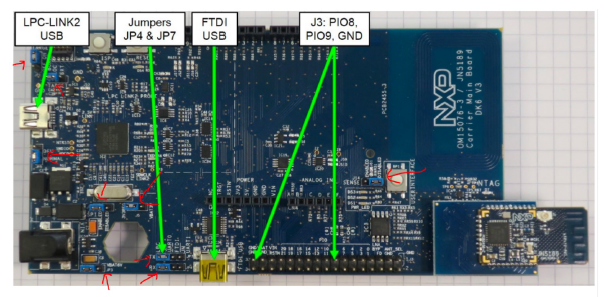

Backends are selected with *-d* or *--device* option.

## CLI operations

1. Connect the USB cable to *FTDI USB* slot.
2. Connect JP7 and JP4 to UART0 - FTDI
3. Issue *dk6prog listdev* optionally with the *-b* option to select the backend
4. Get the DEVICE ID
5. Issue any command specifying DEVICE ID with *-d* parameter



In [3]:
%run ../init_notebook.ipynb

DEVICE_ID = 0
NO_VERBOSE = ""
VERBOSE = "-v"
DEBUG = "-vv"
VERBOSITY = NO_VERBOSE

# Get the device ID
%! dk6prog $VERBOSITY listdev



env: JUPYTER_SPSDK=1
Created `%!` as an alias for `%execute`.
dk6prog  listdev 

This is an experimental utility. Use with caution!

List of available devices:
DEVICE ID: 0, VID: 0x0, PID: 0x0, Serial number: b'DN03TBTK', Description: b'DK6 Carrier Board', Address: 67330069, Backend: Backend.FTD2xx


## ISP Protocol

- ISP sequence is controlled by FTDI CBUS pins in bitbang mode (or
manually with ISP button)
-  Memory must be open in desired access mode before reading/writing
-  Default 115200 baud rate 8N1, no ABR (support up to 1 MBd)
-  ISP authentication (Signed unlock key n=288), Authenticated
commands not implemented (SHA-256 + signature)
- Encrypted transfer AES-CTR – not implemented

## Memory operations
What's supported:

- Read – read to file, stdout
- Write – write to file, stdout
- Erase – erase and check if memory is erased
- Info – info about chip, memories, etc.
- Command chaining – multiple commands might be chained

At first, let's print the memory map of the device using the *info* command and see what's available.



In [4]:
%! dk6prog -d $DEVICE_ID $VERBOSITY info

dk6prog -d 0  info 

This is an experimental utility. Use with caution!

Chip ID: 0x88888888
ROM Version: 0x0
MAC Address: 9A:13:1F:03:00:8D:15:00

Detected DEVICE: 0

  Memory   Memory ID   Base Address   Length    Sector Size   Memory Type   Access  
------------------------------------------------------------------------------------
  FLASH    0           0x0            0x9de00   0x200         FLASH         ALL     
  PSECT    1           0x0            0x1e0     0x10          FLASH         ALL     
  pFLASH   2           0x0            0x1e0     0x10          FLASH         ALL     
  Config   3           0x9fc00        0x200     0x200         FLASH         ALL     
  EFUSE    4           0x0            0x80      0x2           EFUSE (OTP)   WRITE   
  ROM      5           0x3000000      0x20000   0x1           ROM           WRITE   
  RAM0     6           0x4000000      0x16000   0x1           RAM           WRITE   
  RAM1     7           0x4020000      0x10000   0x1           RAM  

In [12]:
# read 8 bytes from flash at addr 0x96000
%! dk6prog $VERBOSITY -d $DEVICE_ID read 0x96000 8 FLASH 
# read data to file
%! dk6prog $VERBOSITY -d $DEVICE_ID read -o data.bin 0x96000 8 FLASH 
# erase 8 bytes from flash
%! dk6prog $VERBOSITY -d $DEVICE_ID erase 0x96000 8 FLASH 
# writes data to flash, read it and erase them
%! dk6prog $VERBOSITY -d $DEVICE_ID write 0x96000 [[123456789abcdef0]] 8 FLASH 
%! dk6prog $VERBOSITY -d $DEVICE_ID read 0x96000 8 FLASH
%! dk6prog $VERBOSITY -d $DEVICE_ID erase 0x96000 8 FLASH

dk6prog  -d 0 read 0x96000 8 FLASH 

This is an experimental utility. Use with caution!

Reading memory
Read 8/8 bytes from 0x96000:0x96008 Memory ID: FLASH
de ad de ad de ad de ad
dk6prog  -d 0 read -o data.bin 0x96000 8 FLASH 

This is an experimental utility. Use with caution!

Reading memory
Read 8/8 bytes from 0x96000:0x96008 Memory ID: FLASH
Writing data to data.bin
dk6prog  -d 0 erase 0x96000 8 FLASH 

This is an experimental utility. Use with caution!

Erasing memory
dk6prog  -d 0 write 0x96000 [[123456789abcdef0]] 8 FLASH 

This is an experimental utility. Use with caution!

Writing memory
Writen 8 bytes to memory ID FLASH at address 0x96000
dk6prog  -d 0 read 0x96000 8 FLASH 

This is an experimental utility. Use with caution!

Reading memory
Read 8/8 bytes from 0x96000:0x96008 Memory ID: FLASH
12 34 56 78 9a bc de f0
dk6prog  -d 0 erase 0x96000 8 FLASH 

This is an experimental utility. Use with caution!

Erasing memory
